# Movies Gross Earnings Correlation Project

The purpose of this project is to find what fields in the given dataset correlates the most with a movie's gross earnings.

Import all required packages and import the data:

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

#Read in the data

df = pd.read_csv(r'C:\Users\oconn\Projects\movies.csv')

Let's take a look at the data.

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Summary statistics:

In [4]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


We will now start cleaning the data before we start any analysis.
Cleaning will comprise of:

- Checking for null values.
- Changing some datatypes for clarity.
- Sorting the data by gross revenue.
- Removing duplicates.
- Numerizing any ordinal data.

Let's start by checking if there are any null values in the data set.

In [5]:
# Any missing data?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


There appears to be a few missing values in most of the columns.
These null values are not required. So we will drop them.

In [6]:
df2 = df.dropna()

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


No null values remain.

Let's quickly check the datatypes in each column.

In [8]:
# Look at datatypes in columns

df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

The columns 'gross', 'budget' and 'votes' are all whole numbers. So we will drop the lagging zeros.

Let's change them to integers:

In [9]:
df2= df2.astype({'gross': np.int64, 'budget': np.int64, 'votes': np.int64})

We will sort the values by gross revenue.

In [10]:
# Order the data by gross revenue
df2 = df2.sort_values(by=['gross'], ascending=False)
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


Now, let's drop any duplicates.

In [11]:
# Drop dupicates
df2.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


Finally, we will "numerize" some ordinal categorical variables. "Rating" is a one such variable. We will assign whole number positive integers to represent the different age ratings. First, let's take a look at the distinct values in the "ratings" column.

In [12]:
unique, counts = np.unique(df2['rating'], return_counts=True)
dict(zip(unique, counts))

{'Approved': 1,
 'G': 111,
 'NC-17': 12,
 'Not Rated': 44,
 'PG': 907,
 'PG-13': 1729,
 'R': 2597,
 'TV-MA': 2,
 'Unrated': 17,
 'X': 1}

Some age ratings are "duplicates". the X, TV-MA and NC-17 ratings all represent the same age range. As does "Not Rated" and "Unrated". We will also group "Approved" with "G". Let's do that and take a look:

In [13]:
df2['rating_num'] = df2['rating']
df2['rating_num'].replace(to_replace='NC-17', value= 'X', inplace=True)
df2['rating_num'].replace(to_replace='TV-MA', value= 'X', inplace=True)
df2['rating_num'].replace(to_replace='Unrated', value= 'Not Rated', inplace=True)
df2['rating_num'].replace(to_replace='Approved', value= 'G', inplace=True)
unique, counts = np.unique(df2['rating_num'], return_counts=True)
dict(zip(unique, counts))

{'G': 112, 'Not Rated': 61, 'PG': 907, 'PG-13': 1729, 'R': 2597, 'X': 15}

We will now assign codes to the ratings. The codes will be positive whole number integer values between 0 and 5. They will be assigned in order of increasing age limit. For example: 1 = "G", 2 = "PG", 5 = "X" etc. 0 will be assigned to "Not Rated". Let's take a look:

In [14]:
rating = np.array(['Not Rated','G', 'PG', 'PG-13', 'R', 'X'])
num = np.arange(0,len(rating))
codes = dict(zip(rating, num))
df2['rating_num'] = df2['rating_num'].map(codes)
unique, counts = np.unique(df2['rating_num'], return_counts=True)
dict(zip(unique, counts))

{0: 61, 1: 112, 2: 907, 3: 1729, 4: 2597, 5: 15}

Let's now start the analysis. We will compare gross revenue to all other numerical values in the dataset and use correlation coefficents to see what correlates best with gross revenue.

Let's make a few scatterplots of gross revenue and all other numerical fields to see if there are any linear relationships.

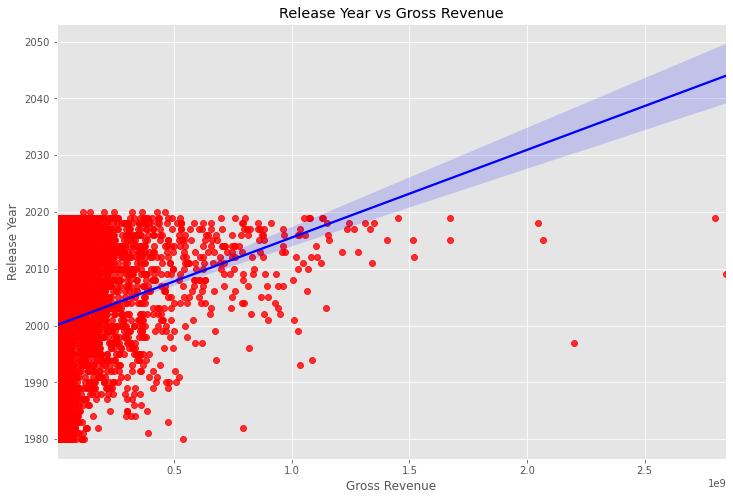

In [15]:
sns.regplot(x='gross',y='year',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Release Year vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Release Year')
plt.show()

On visual inspection, there appears to be no obvious linear relationship between movie release year and gross revenue. Gross revenue does seem to be rising somewhat in recent years, but there is no clear pattern.

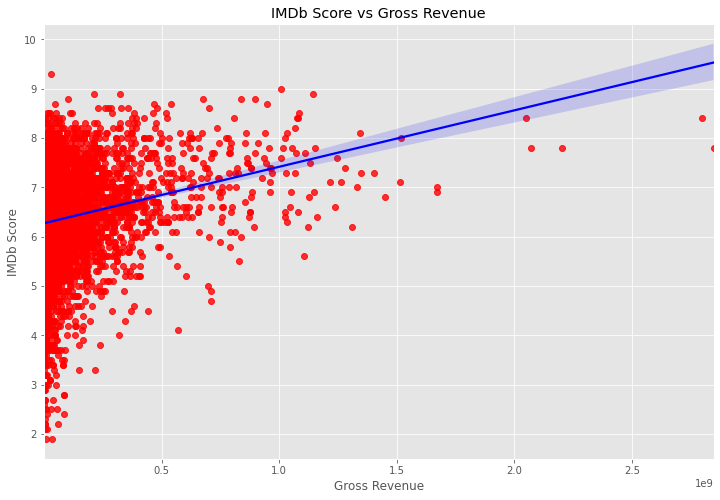

In [16]:
# Do a regression plot
sns.regplot(x='gross',y='score',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('IMDb Score vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('IMDb Score')
plt.show()

Surprisingly, there doesn't seem to be a particularly strong linear relationship between user score on IMDb and the gross revenue of a movie. Again, a small rise in gross revenue with user score, but overall fairly insignificant.

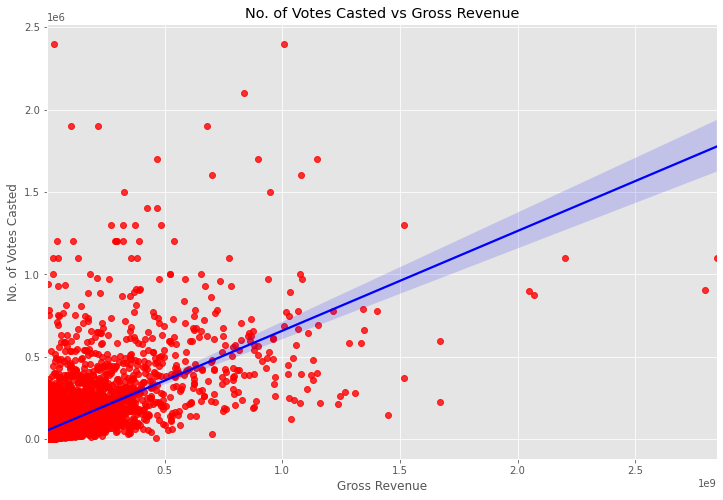

In [17]:
sns.regplot(x='gross',y='votes',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('No. of Votes Casted vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('No. of Votes Casted')
plt.show()

There definitely seems to be some sort of linear relationship between the number of votes casted on a movie and it's gross revenue. The relationship looks relatively strong, however there is a lot of spread in the data particularly when it comes to the outliers.

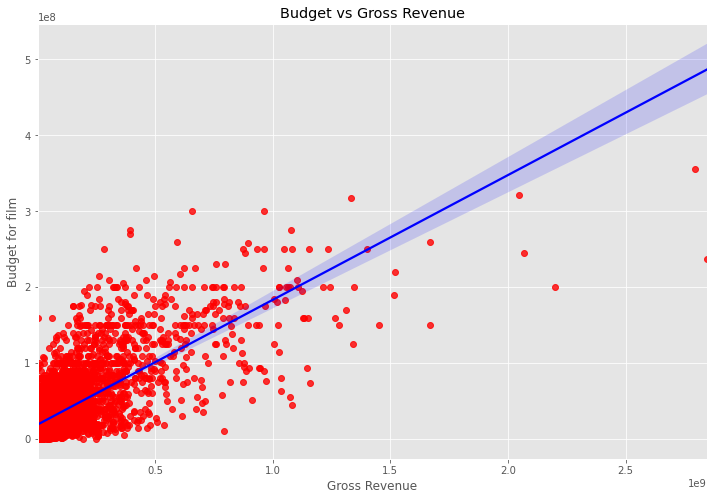

In [18]:
sns.regplot(x='gross',y='budget',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for film')
plt.show()

Possibly the strongest and clearest linear relationship with gross revenue. There are few outliers and the spread is much smaller compared to that of the graph of votes vs gross revenue.

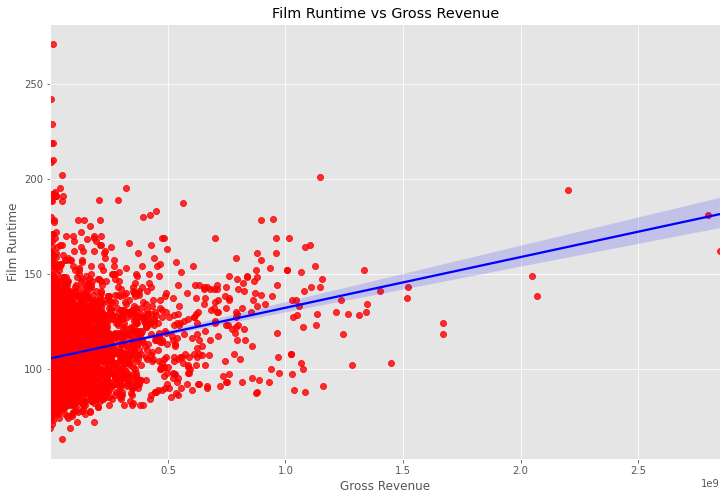

In [19]:
sns.regplot(x='gross',y='runtime',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Film Runtime vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Film Runtime')
plt.show()

A slightly stronger linear relationship than that of release year and score, but not particularly significant either.

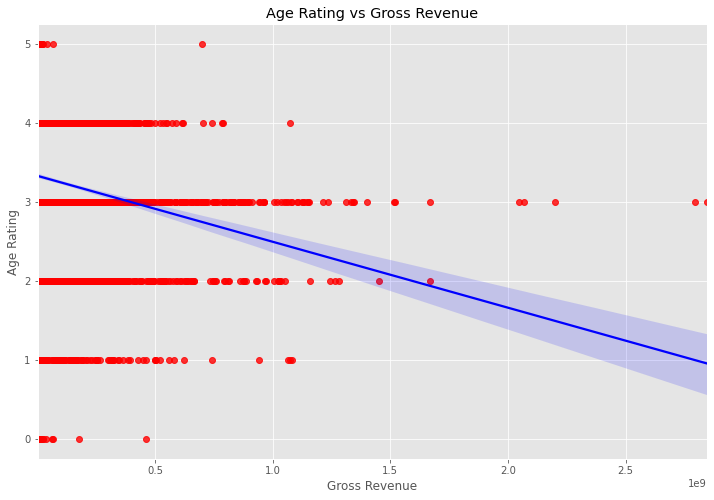

In [20]:
sns.regplot(x='gross',y='rating_num',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Age Rating vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Age Rating')
plt.show()

Finally, age rating has a very weak relationship with gross revenue too.

Now that we have had a look at how the data behaves, let's look at the correlation coefficients between the various numerical data.

In [21]:
corr_tab = df2.corr()
corr_tab

,year,score,votes,budget,gross,runtime,rating_num
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.014673
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.070678
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.016603
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,-0.198520
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,-0.176454
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.118326
rating_num,0.014673,0.070678,0.016603,-0.198520,-0.176454,0.118326,1.000000


Judging by the above table, there is a fairly high correlation between budget and gross earnings

For more clarity, let's make a heat map of the correlations between different numerical "Movie Features".

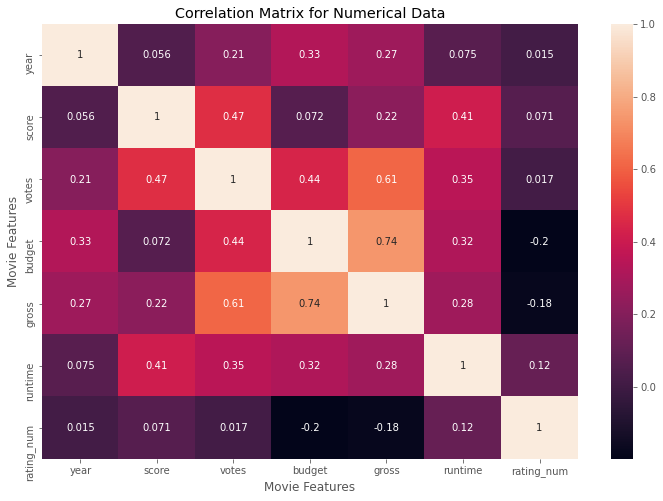

In [22]:
corr_mat = df2.corr()
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix for Numerical Data')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Let's summarize the data by unstacking the above table:

In [23]:
unstacked_corr = corr_tab.unstack()
unstacked_corr

year        year          1.000000
            score         0.056386
            votes         0.206021
            budget        0.327722
            gross         0.274321
            runtime       0.075077
            rating_num    0.014673
score       year          0.056386
            score         1.000000
            votes         0.474256
            budget        0.072001
            gross         0.222556
            runtime       0.414068
            rating_num    0.070678
votes       year          0.206021
            score         0.474256
            votes         1.000000
            budget        0.439675
            gross         0.614751
            runtime       0.352303
            rating_num    0.016603
budget      year          0.327722
            score         0.072001
            votes         0.439675
            budget        1.000000
            gross         0.740247
            runtime       0.318695
            rating_num   -0.198520
gross       year    

Let's isolate the high negative and positive correlations (absolute value of r above 0.5)

In [24]:
unstacked_gross = unstacked_corr['gross']
high_corr = unstacked_gross[abs(unstacked_gross)>0.5]
high_corr

votes     0.614751
budget    0.740247
gross     1.000000
dtype: float64

Then, we will isolate the low negative and positive (absolute value of r less than 0.3)

In [25]:
low_corr =  unstacked_gross[abs(unstacked_gross)<0.3]
low_corr

year          0.274321
score         0.222556
runtime       0.275796
rating_num   -0.176454
dtype: float64

# Conclusion

Before trying to interperet the results, it must be noted that the gross revenue values used in this analysis include box office ticket sales only and does not include things like DVD, Blu-Ray, streaming and toy sales etc.

Gross revenue is strongly positively correlated (above 0.6) with the number of votes a movie receives from IMDb users and is also very strongly correlated (above 0.74) with its budget. This makes sense as we would expect the number of voters on a movie to increase as more people see the movie. And as more people see the movie, it's revenue will go up as more people are paying to see it.

Gross revenue is weakly positively correlated with runtime (0.28), IMDB score (0.22) and year of release (0.27).

A positive correlation between revenue and IMDb score is to be expected, but such a weak score is a little surprising. Therefore, according to IMDb's scoring system, the amount of money a movie made at the box office is not a reliable gauge for the quality of the movie.

Interestingly, score and budget are very weakly positively correlated at 0.072. This implies that a movie's reception by the public is almost completely independent of how large its budget was.

There is a weak negaitive correlation (-0.18) between a movie's age rating and gross revenue. This shows that movies intended for older audiences make a little less money on average. This is probably due to the fact that by definition, less people are allowed to view movies with higher age ratings at cinemas. But the weak correlation suggests that this effect is very small.

Since the number of people who voted on a movie is directly proportional to the total number of people that saw the movie, we can use this as a rough estimate of viewership relative to other movies listed on IMDb. Therefore, the relationship between votes and gross revenue should be obvious. In fact, since every person who has seen a particular movie has not casted a vote on that movie on IMDb, the "viewership" vs. gross revenue correlation of 0.6 is a lot lower than expected. Therefore, according to this dataset, by far the most important factor in determining the financial success of a movie at the box office appears to be the movie's budget.
As gross revenue correlates with IMDb score, or "audience reception" rather weakly and there is virtually no correlation between a movie's budget and its score, it suggests that a movie with a large budget rarely produces a movie that is both fincially successful at the box office AND one that is received well by the public. So, if a large budget does not produce a well received movie, it is possible that marketing may be the reason why movies with a high budget do well at the box office. A higher budget will generally be proportional to more money spent on marketing/ advertising. This will arouse public intrigue leading to massive sales at the box office.